In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install uproot awkward 
from uproot_io import Events, View
import features as f

In [3]:
def correlation_data(events, hits_cutoff):
    events_size = len(events.num_final_state_particles)

    feature_data = []
    
    for i in range(events_size):
        if len(events.reco_hits_w[i]) > hits_cutoff:
            var1 = f.rms(events,i)
            var2 = f.q4_ratio(events,i)
            var3 = f.line(events,i)
            var4 = f.correlation(events,i)
            var5 = f.noise(events,i)

            feature_data.append([var1, var2, var3, var4, var5])
    return feature_data

In [4]:
cheated_0 = Events('CheatedRecoFile_0.root')

feature_data = correlation_data(cheated_0, 15)

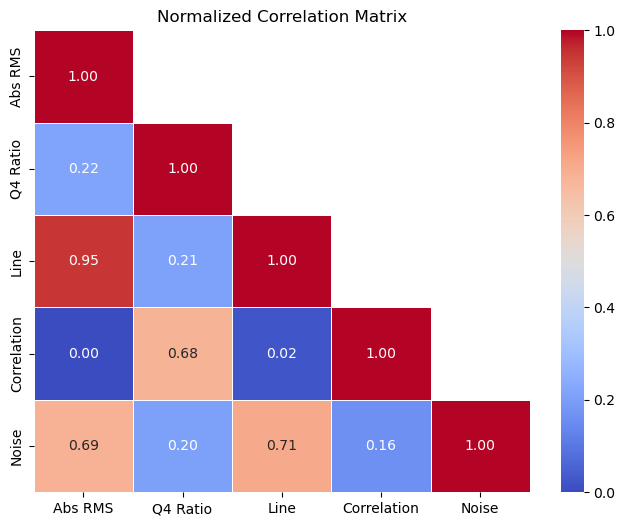

In [6]:
# Create DataFrame
df = pd.DataFrame(feature_data, columns=["Abs RMS", "Q4 Ratio", "Line", "Correlation", "Noise"])

# Compute correlation matrix
correlation_matrix = df.corr()

# Normalize correlation matrix to range [0, 1]
correlation_matrix_normalized = (correlation_matrix - correlation_matrix.min().min()) / (
    correlation_matrix.max().max() - correlation_matrix.min().min()
)

# Create a mask for the upper triangle, excluding the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(correlation_matrix_normalized, 
            mask=mask,         # Mask upper triangle, excluding diagonal
            annot=True,        # Display values
            cmap='coolwarm',   # Color scheme
            fmt=".2f",         # Format values to 2 decimal places
            linewidths=0.5,
            vmin=0, vmax=1)    # Scale from 0 to 1

# Add title and display
plt.title("Normalized Correlation Matrix")
plt.show()

# How to change
in the last cell you can change the $colourmap=""$ argument, just ask chatgpt which ones to do and play around with them.

you may also want to change the names of the variables in the dataframe

other than that, just play around with the sns.heatmap arguments.

NOTE: this is with features that return weird confusion matrices that have NOT been fixed yet.

In [24]:
rms_values = np.array([])
q4_values = np.array([])
line_values = np.array([])
correlation_values = np.array([])
noise_values = np.array([])

for i in range(len(cheated_0.num_final_state_particles)):
    if len(cheated_0.reco_hits_w[i]) > 15:
        rms_values = np.append(rms_values, f.rms(cheated_0,i))

for i in range(len(cheated_0.num_final_state_particles)):
    if len(cheated_0.reco_hits_w[i]) > 15:
        q4_values = np.append(q4_values, f.q4_ratio(cheated_0,i))

for i in range(len(cheated_0.num_final_state_particles)):
    if len(cheated_0.reco_hits_w[i]) > 15:
        line_values = np.append(line_values, f.line(cheated_0,i))

for i in range(len(cheated_0.num_final_state_particles)):
    if len(cheated_0.reco_hits_w[i]) > 15:
        correlation_values = np.append(correlation_values, f.correlation(cheated_0,i))

for i in range(len(cheated_0.num_final_state_particles)):
    if len(cheated_0.reco_hits_w[i]) > 15:
        noise_values = np.append(noise_values, f.noise(cheated_0,i))

In [25]:
print(len(rms_values))
print(len(q4_values))
print(len(line_values))
print(len(correlation_values))
print(len(noise_values))

49155
49155
49155
49155
49155


In [37]:
true_shower = np.array([])

for i in range(len(cheated_0.num_final_state_particles)):
    if len(cheated_0.reco_hits_w[i]) > 15:
        if cheated_0.mc_pdg[i] in [-11, 11, 22]:
            true_shower = np.append(true_shower,True)
        else: true_shower = np.append(true_shower,False)

true_shower = np.array(true_shower, dtype=bool)

In [38]:
print(len(true_shower))

49155


In [42]:
# RMS values
rms_shower = rms_values[true_shower]
rms_track = rms_values[~true_shower]
print(f'RMS min = {np.min(rms_values)}, max = {np.max(rms_values)}')

# Q4 values
q4_shower = q4_values[true_shower]
q4_track = q4_values[~true_shower]
print(f'Q4 min = {np.min(q4_values)}, max = {np.max(q4_values)}')

# Line values
line_shower = line_values[true_shower]
line_track = line_values[~true_shower]
print(f'Line min = {np.min(line_values)}, max = {np.max(line_values)}')

# Correlation values
correlation_shower = correlation_values[true_shower]
correlation_track = correlation_values[~true_shower]
print(f'Correlation min = {np.min(correlation_values)}, max = {np.max(correlation_values)}')

# Noise values
noise_shower = noise_values[true_shower]
noise_track = noise_values[~true_shower]
print(f'Noise min = {np.min(noise_values)}, max = {np.max(noise_values)}')


RMS min = 0.0032097729854285717, max = 71.30354309082031
Q4 min = 0.01239792381382715, max = 0.7557963963137901
Line min = 0.4491453468799591, max = 88.78897586945564
Correlation min = 0.003934920585040813, max = 99.99949022049255
Noise min = 1.0, max = 973.0


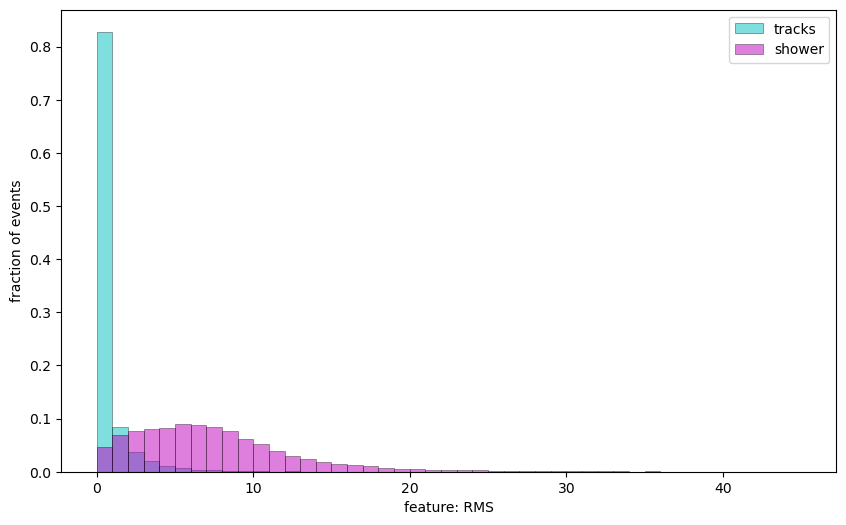

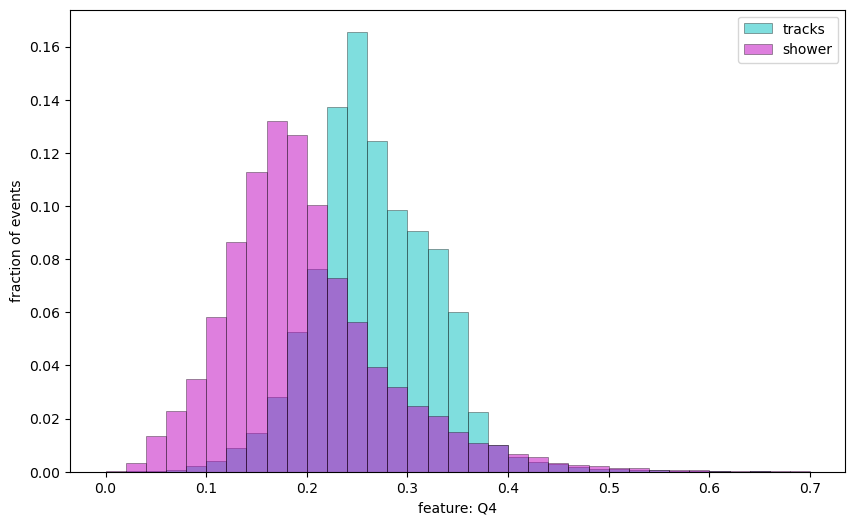

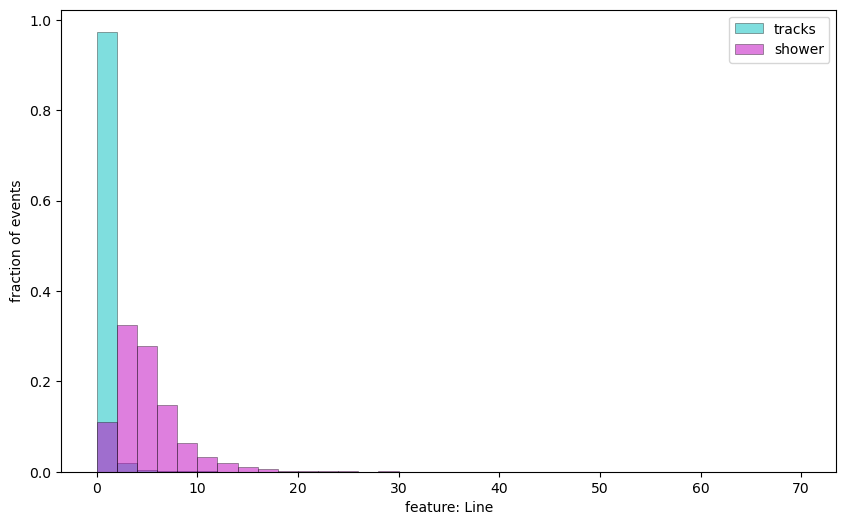

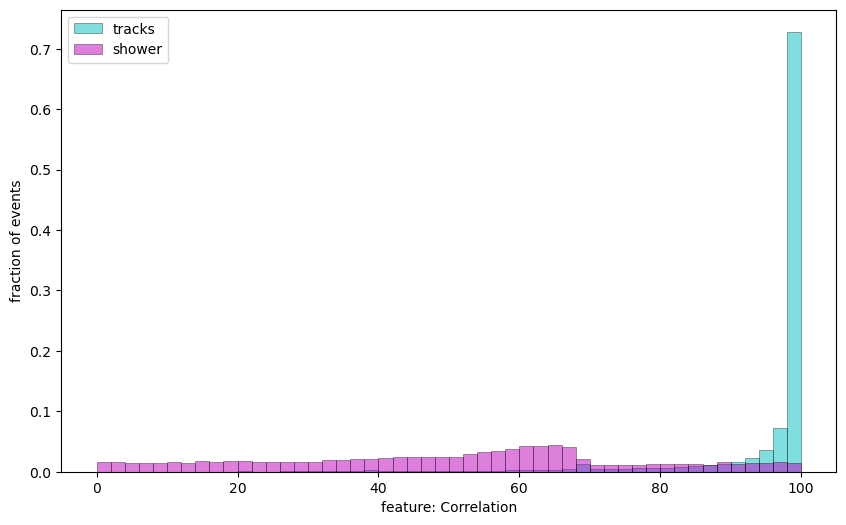

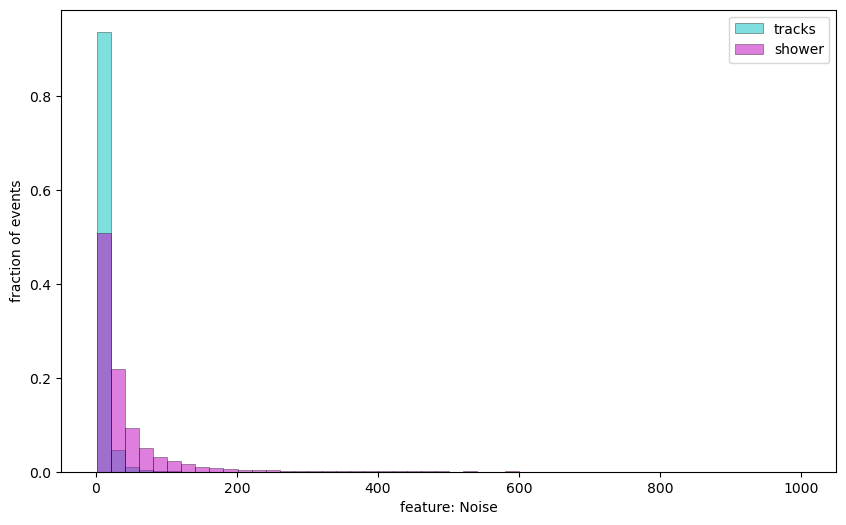

In [46]:
# Bin definitions
rms_bins = np.linspace(0, 45, 46)
q4_bins = np.linspace(0, 0.7, 36)
line_bins = np.linspace(0, 70, 36)
correlation_bins = np.linspace(0, 100, 51)
noise_bins = np.linspace(1, 1000, 51)

# Plot histograms for RMS
rms_pdf = f.feature_histogram('RMS', rms_track, rms_shower, rms_bins)

# Plot histograms for Q4 ratio
q4_pdf = f.feature_histogram('Q4', q4_track, q4_shower, q4_bins)

# Plot histograms for Line
line_pdf = f.feature_histogram('Line', line_track, line_shower, line_bins)

# Plot histograms for Correlation
correlation_pdf = f.feature_histogram('Correlation', correlation_track, correlation_shower, correlation_bins)

# Plot histograms for Noise
noise_pdf = f.feature_histogram('Noise', noise_track, noise_shower, noise_bins)

In [48]:
# Save RMS PDF data
np.savez('RMS_pdf.npz', 
         track_bin_heights=rms_pdf[0], 
         shower_bin_heights=rms_pdf[1], 
         bin_edges=rms_pdf[2])

# Save Q4 PDF data
np.savez('Q4_pdf.npz', 
         track_bin_heights=q4_pdf[0], 
         shower_bin_heights=q4_pdf[1], 
         bin_edges=q4_pdf[2])

# Save Line PDF data
np.savez('Line_pdf.npz', 
         track_bin_heights=line_pdf[0], 
         shower_bin_heights=line_pdf[1], 
         bin_edges=line_pdf[2])

# Save Correlation PDF data
np.savez('Correlation_pdf.npz', 
         track_bin_heights=correlation_pdf[0], 
         shower_bin_heights=correlation_pdf[1], 
         bin_edges=correlation_pdf[2])

# Save Noise PDF data
np.savez('Noise_pdf.npz', 
         track_bin_heights=noise_pdf[0], 
         shower_bin_heights=noise_pdf[1], 
         bin_edges=noise_pdf[2])

# Now use some of Gen's code

In [ ]:
#later